# Customer Segmentation

Group Name: cust_seg

Specialization: Data Science

Submitted to: Data Glacier

Internship Batch: LISUM12

Team Member Details:
-	Brennan Clinch, bclincher98@gmail.com, USA, North Carolina State University, Data Science
-	Rohit Sunku, rgs8890@gmail.com, UK, Le Wagon, Data Science (Not contributing)
-	Kutay Selçuk, kutay.selcuk@ozu.edu.tr, Turkey,  Ozyegin University, Data Science (Not contributing)
-	Zhan Shi, zhanshi@g.ucla.edu, USA,  University of California Los Angeles, Data Science


## Reading in and preprocessing the data

In [1]:
# Read in required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import preprocessing

In [2]:
# Read in data
cust = pd.read_csv("C://Users//JCCLI//Downloads//cust_seg_clean.csv")
## Change columns to English translation
cust.columns = ['Date', 'Customer_id', 'Employee index', 'Country', 'Gender', 'Age', 'Contract date', 'New customer index', 'Seniority(months)', 'Primary',
                'Customer type', 'Customer relation type', 'Residence index', 'Foreigner index', 'Channel', 'Deceased index',
               'Province name', 'Activity index', 'Income', 'Saving account', 'Guarantees', 'Current account', 'Derivada account',
              'Payroll account', 'Junior account', 'Most particular account', 'Particular account', 'Particular plus account', 'Short-term deposits', 'Medium-term deposits',
                'Long-term deposits', 'e-account', 'Funds', 'Mortage', 'Pensions_1', 'Loans', 'Taxes', 'Credit card', 'Securities', 'Home account', 'Payroll', 'Pensions_2', 'Direct debit']

In [9]:
## Change H/V to male or female
def gender(x):
    if x == 'H':
        return 'M'
    else:
        return 'F'
cust['Sex'] = cust['Gender'].apply(gender)

In [10]:
# Set up age group variable used in EDA
def age_group(x):
    if x < 21:
        return "less than 21"
    elif x >= 21 and x <= 30:
        return "21-30"
    elif x >= 31 and x <= 40:
        return "30-40"
    elif x >= 41 and x <= 65:
        return "41-65"
    else:
        return ">65"
cust['Age group']  = cust['Age'].apply(age_group)

In [11]:
# Set up income group variable used in EDA
def income_group(x):
    if x <= 30000:
        return "income less than 30,000"
    elif x > 30000 and x <= 50000:
        return "income between 30,000 and 50,000"
    elif x > 50000 and x <= 100000:
        return "income between 50,000 and 100,000"
    elif x > 100000 and x <= 500000:
        return "income between 100,000 and 500,000"
    else:
        return "income greater than 500,000"
    
cust['Income group']  = cust['Income'].apply(income_group)
    

In [12]:
# Set up seniority group variable used in EDA
def seniority(x):
    if x >= 0 and x <= 50:
        return "customers between 0 and 50 months"
    elif x >= 51 and x <= 100:
        return "customers between 51 and 100 months"
    elif x >= 101 and x <= 150:
        return "customers between 101 and 150 months"
    elif x > 150 and x <= 200:
        return "customers between 151 and 200 months"
    else:
        return "customers more than 200 months"

cust['Seniority group'] = cust['Seniority(months)'].apply(seniority)

In [3]:
# Create new dataframe of the different products used by customers
products = ['Saving account', 'Guarantees',
       'Current account', 'Derivada account', 'Payroll account',
       'Junior account', 'Most particular account', 'Particular account',
       'Particular plus account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortage', 'Pensions_1', 'Loans', 'Taxes', 'Credit card', 'Securities',
       'Home account', 'Payroll', 'Pensions_2', 'Direct debit']

In [4]:
# Initiate total products dataframe which is the sum of all products being used by customer
total_products = cust.groupby('Customer_id')[products].sum()

In [5]:
# Create loop that will go through products that a customer has and sum them up and apply back to original total
# If the customer doesn't have any products used, the value would just be zero
for product in products:
    total_products[product] = total_products[product].apply(lambda x: 1 if x > 0 else 0)

In [6]:
# Return total products column to total products dataframe
total_products['total_products'] = total_products.sum(axis=1)

### Final data cleaning

In [7]:
# Check the columns of dataset
cust.columns

Index(['Date', 'Customer_id', 'Employee index', 'Country', 'Gender', 'Age',
       'Contract date', 'New customer index', 'Seniority(months)', 'Primary',
       'Customer type', 'Customer relation type', 'Residence index',
       'Foreigner index', 'Channel', 'Deceased index', 'Province name',
       'Activity index', 'Income', 'Saving account', 'Guarantees',
       'Current account', 'Derivada account', 'Payroll account',
       'Junior account', 'Most particular account', 'Particular account',
       'Particular plus account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortage', 'Pensions_1', 'Loans', 'Taxes', 'Credit card', 'Securities',
       'Home account', 'Payroll', 'Pensions_2', 'Direct debit'],
      dtype='object')

In [13]:
# Merge total products with original cleaned data table
total_products = total_products.reset_index(level=0)
df_final = total_products.merge(cust[['Customer_id','Employee index', 'Country', 'Sex', 'Age', 'Contract date', \
                                     'New customer index', 'Seniority(months)', 'Primary', 'Customer type', \
                                     'Customer relation type', 'Residence index', 'Foreigner index', 'Channel', \
                                     'Deceased index', 'Province name', 'Activity index', 'Income', 'Age group', \
                                     'Income group', 'Seniority group']], on = 'Customer_id')


In [12]:
# Validate merge to make sure it was successful
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818259 entries, 0 to 818258
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_id              818259 non-null  int64  
 1   Saving account           818259 non-null  int64  
 2   Guarantees               818259 non-null  int64  
 3   Current account          818259 non-null  int64  
 4   Derivada account         818259 non-null  int64  
 5   Payroll account          818259 non-null  int64  
 6   Junior account           818259 non-null  int64  
 7   Most particular account  818259 non-null  int64  
 8   Particular account       818259 non-null  int64  
 9   Particular plus account  818259 non-null  int64  
 10  Short-term deposits      818259 non-null  int64  
 11  Medium-term deposits     818259 non-null  int64  
 12  Long-term deposits       818259 non-null  int64  
 13  e-account                818259 non-null  int64  
 14  Fund

<AxesSubplot:>

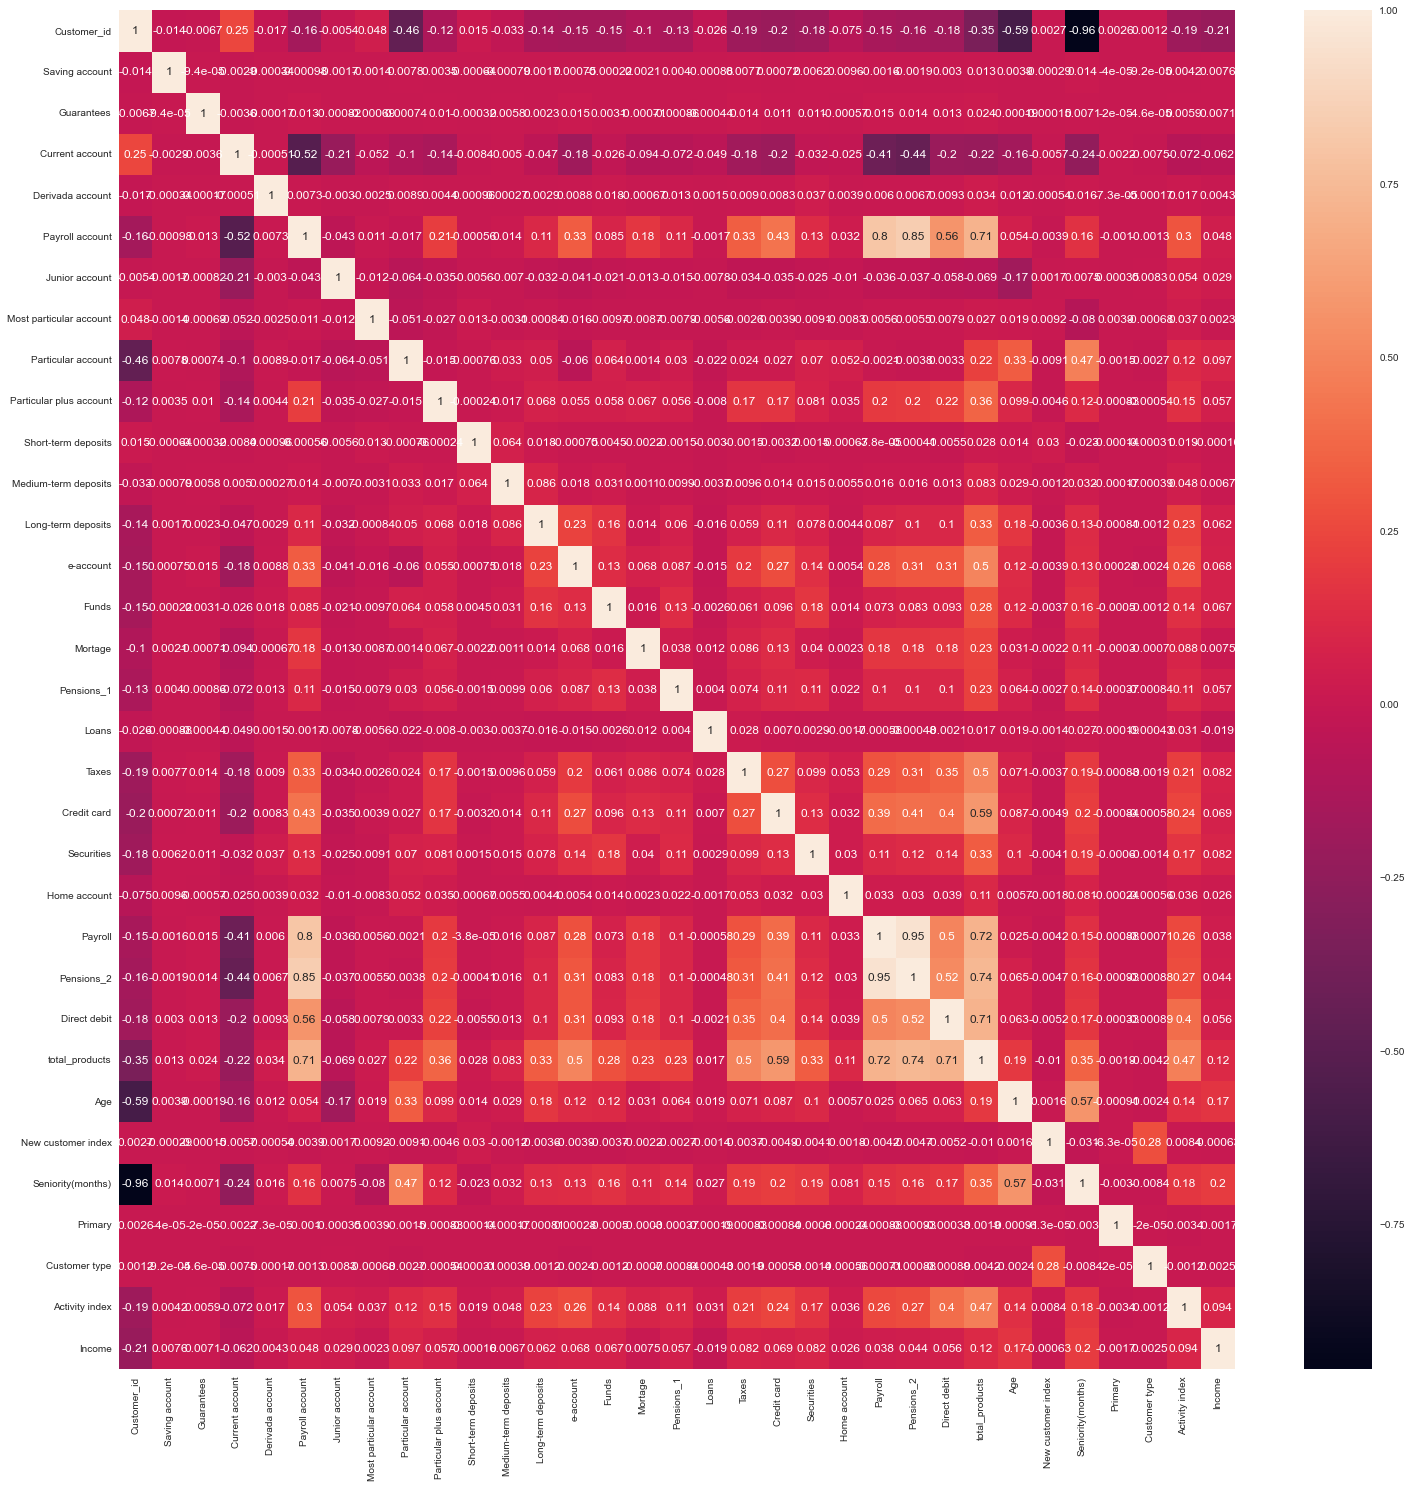

In [13]:
### Check correlation between variables
corr_matrix = df_final.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr_matrix, annot = True)

The variables that have the biggest associations with another (|0.8| or higher) are:

- Customer ID and Seniority
- Pensions_2 and Payroll
- Payroll and Payroll Account
- Pensions_2 and Payroll Account

- We would also like to analyze some other variables to see if we can remove any unnecessary data before doing our modeling.

In [14]:
df_final['New customer index'].value_counts().head(10)

0.0    817882
1.0       377
Name: New customer index, dtype: int64

In [16]:
df_final['Province name'].value_counts().head(10)

MADRID       297536
BARCELONA     71282
SEVILLA       33729
VALENCIA      33259
MALAGA        20440
ZARAGOZA      19817
MURCIA        18625
CORUÑA, A     18189
ALICANTE      15414
CADIZ         15307
Name: Province name, dtype: int64

In [22]:
df_province.to_csv('C://Users//JCCLI//Downloads//cust_seg_provinces.csv', index = False, header = True)

In [21]:
df_province = df_final.iloc[:, [40]]
df_province['Province name'].value_counts().head(10)

MADRID       297536
BARCELONA     71282
SEVILLA       33729
VALENCIA      33259
MALAGA        20440
ZARAGOZA      19817
MURCIA        18625
CORUÑA, A     18189
ALICANTE      15414
CADIZ         15307
Name: Province name, dtype: int64

In [20]:
df_final['Activity index'].value_counts().head(10)

1.0    469848
0.0    348411
Name: Activity index, dtype: int64

In [21]:
# explore customer type
df_final['Customer type'].value_counts().head(10)

1.0    818222
3.0        37
Name: Customer type, dtype: int64

In [16]:
# explore customer relation type
df_final['Customer relation type'].value_counts().head(10)

A    460535
I    357687
P        37
Name: Customer relation type, dtype: int64

In [38]:
df_final['Age group'].value_counts().head(10)

41-65           353222
21-30           194953
30-40           137625
>65              86602
less than 21     45857
Name: Age group, dtype: int64

In [39]:
df_final['Income group'].value_counts().head(10)

income between 100,000 and 500,000    435942
income between 50,000 and 100,000     300098
income between 30,000 and 50,000       66089
income less than 30,000                11417
income greater than 500,000             4713
Name: Income group, dtype: int64

In [40]:
df_final['Seniority group'].value_counts().head(10)

customers between 0 and 50 months       300633
customers between 151 and 200 months    182258
customers between 101 and 150 months    169730
customers between 51 and 100 months     107839
customers more than 200 months           57799
Name: Seniority group, dtype: int64

In [85]:
cust['Employee index'].value_counts().head(10)

N    817393
B       345
A       263
F       256
S         2
Name: Employee index, dtype: int64

In [41]:
df_final['Channel'].value_counts().head(10)

KAT    262959
KFC    215771
KHE    201024
KFA     32524
KAS      7087
KAG      6847
KAA      5342
KAB      5245
KAY      4992
KHK      4823
Name: Channel, dtype: int64

In [14]:
# Filter final data frame of any unnecessary variables or values
df_final = df_final[df_final['Country']== 'ES']
df_final = df_final[df_final['Customer type'] == 1.0]
df_final = df_final[df_final['Employee index']!= 'S']

In [15]:
# Subset channels to only include the top 10
channels = ['KAT','KFC','KHE','KFA','KAS','KAG','KAA','KAB','KAY','KHK']
df_final = df_final.loc[df_final['Channel'].isin(channels)]

In [17]:
# Change all categorical variables to numeric factors before doing the modeling
le = preprocessing.LabelEncoder()
for column_name in df_final.columns:
    if df_final[column_name].dtype == object:
        df_final[column_name] = le.fit_transform(df_final[column_name])
    else:
        pass

In [18]:
# Delete customer id
col_del = ['Customer_id']
df_final = df_final.drop(col_del,axis=1)

#### Information about number codes for categorical variables when doing modeling

In [ ]:
#df_final['Age group'].value_counts().head(10)

# 0 = 21-30
# 1 = 30-40
# 2 = 41-65
# 3 = >65
# 4 = less than 21

In [ ]:
#df_final['Income group'].value_counts().head(10)

# 0 = income between 100,000 and 500,000
# 1 = income between 30,000 and 50,000
# 2 = income between 50,000 and 100,000
# 3 = income greater than 500,000
# 4 = income less than 30,000

In [ ]:
#df_final['Seniority group'].value_counts().head(10)

# 0 = customers between 0 and 50 months
# 1 = customers between 101 and 150 months
# 2 = customers between 151 and 200 months
# 3 = customers between 51 and 100 months
# 4 = customers more than 200 months

In [ ]:
#df_final['Sex'].value_counts().head(10)
# 0 = Female
# 1 = Male

In [ ]:
#df_final['Employee index'].value_counts().head(10)
# 3 = N
# 1 = B
# 2 = A
# 0 = F
# 4 = S

## Modeling

- For our modeling, we will be using unsupervised learning because we have no dependent variables
- We will try out K-Means and Hierarchical Clustering since we are wanting to separate customers into 5 different groups so the business can roll out special offers to the 5 groups.

### K-Means Clustering

K-Means Clustering is a type of clustering method used in unsupervised learning and most likely the most popular type of clustering along with being the most popular type of unsupervised learning. The objective of K-Means Clustering is to partition n observations into k clusters in which each observation belongs to cluster with the nearest mean. It is widely used in business to help identify unknown trends or groups in large or complex data sets.

##### Principal Components Analysis
- To make our K-Means clusters as interpretable as possible, one such way is dimensionality reduction. One such dimensionality reduction techinique is PCA (Principal Components Analysis).

- Principal Component Analysis aims to reduce the number of random variables, by getting a set of principal variables (or components).

- We will need to scale our dataset before doing PCA.

In [19]:
# Scale our original dataset before PCA
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()
scaled_frame = scaler.fit_transform(df_final)
scaled_final_df = pd.DataFrame(scaled_frame, columns = df_final.columns)
scaled_final_df

,index,Saving account,Guarantees,Current account,Derivada account,Payroll account,Junior account,Most particular account,Particular account,Particular plus account,...,Residence index,Foreigner index,Channel,Deceased index,Province name,Activity index,Income,Age group,Income group,Seniority group
0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.444444,0.0,0.571429,1.0,0.522793,0.50,0.0,1.0
1,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.444444,0.0,0.571429,1.0,0.522793,0.50,0.0,1.0
2,0.000002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.444444,0.0,0.571429,1.0,0.113044,0.50,0.5,1.0
3,0.000002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.444444,0.0,0.571429,1.0,0.113044,0.50,0.5,1.0
4,0.000004,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.444444,0.0,0.571429,1.0,0.690695,0.50,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746558,0.999988,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.836735,1.0,0.224251,0.50,0.0,0.0
746559,0.999990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.122449,1.0,0.134988,0.25,0.5,0.0
746560,0.999996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.0,0.571429,1.0,0.208487,0.50,0.0,0.0
746561,0.999998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.0,0.571429,1.0,0.127842,0.50,0.5,0.0


In [20]:
pca = PCA()
final_df_PCA = pd.DataFrame(pca.fit_transform(scaled_final_df))
final_df_PCA

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.044814,0.678738,-0.467241,-0.203956,0.712231,-0.475494,-0.475942,0.377808,0.000473,-0.310645,...,0.019101,0.322834,0.001175,-0.001998,-0.001178,0.000034,6.685783e-13,-2.438829e-17,-1.880408e-17,-1.116053e-16
1,1.044814,0.678738,-0.467241,-0.203956,0.712231,-0.475494,-0.475942,0.377808,0.000473,-0.310645,...,0.019101,0.322834,0.001175,-0.001998,-0.001178,0.000034,-1.081946e-15,-2.286934e-17,-3.036755e-17,-5.281245e-19
2,2.302298,-0.055009,1.257418,-0.405633,0.561672,-0.264613,0.015179,0.103504,0.415308,0.238457,...,0.071172,0.981553,-0.000887,-0.003677,-0.001780,-0.000014,-3.389229e-14,-6.664525e-17,-8.734324e-17,3.725899e-18
3,2.302298,-0.055009,1.257418,-0.405633,0.561672,-0.264613,0.015179,0.103504,0.415308,0.238457,...,0.071172,0.981553,-0.000887,-0.003677,-0.001780,-0.000014,2.743898e-13,6.961105e-17,-1.295227e-16,-1.794045e-17
4,2.001136,0.003021,0.712552,0.637231,0.730080,-0.602285,0.729202,-0.330663,-0.470371,-0.072219,...,0.020049,0.320942,0.001840,-0.002267,-0.001138,0.000029,6.935253e-15,-2.355380e-17,-3.190871e-17,-1.800617e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746558,-0.268027,-0.881764,-0.596362,0.426947,-0.271154,-0.119240,-0.008353,-0.056287,0.066988,-0.434537,...,-0.000454,-0.000037,0.000023,0.000388,0.000034,0.000007,4.778106e-17,-2.551179e-19,-1.333010e-19,2.329241e-19
746559,-0.267008,-0.772737,-0.672812,-0.585555,-0.340229,0.036134,-0.080946,0.189745,-0.050310,0.374749,...,-0.000767,0.000676,0.000151,0.000289,0.000045,-0.000001,3.538493e-17,2.452000e-20,-3.541869e-20,-7.495438e-20
746560,-0.145338,-0.621195,-0.694251,-0.523739,-0.329863,-0.104740,-0.028673,0.061919,-0.079016,-0.269537,...,-0.000804,0.000552,0.000547,0.000079,0.000068,-0.000010,5.215764e-17,6.202919e-20,1.155753e-19,-1.449140e-19
746561,-0.169615,-0.639846,-0.690302,-0.535573,-0.346855,-0.080031,-0.047132,-0.074242,0.232412,0.079039,...,-0.000752,0.000988,0.000475,0.000174,0.000099,-0.000010,3.580327e-17,8.930061e-20,-6.556765e-21,-1.298552e-19


In [21]:
pca.explained_variance_ratio_

array([2.59462807e-01, 1.30053617e-01, 1.03259097e-01, 8.52445651e-02,
       4.89429994e-02, 4.52270260e-02, 3.18208295e-02, 2.55078846e-02,
       2.48715002e-02, 2.41475612e-02, 2.36806021e-02, 2.26580698e-02,
       2.02985531e-02, 1.89995650e-02, 1.80386922e-02, 1.54877477e-02,
       1.38175528e-02, 1.27133794e-02, 1.06570265e-02, 1.06038700e-02,
       9.12380883e-03, 8.27911335e-03, 6.48824351e-03, 5.37596292e-03,
       4.56962151e-03, 3.54984720e-03, 3.43607864e-03, 3.21357656e-03,
       2.49510291e-03, 1.37318793e-03, 1.35269740e-03, 1.17539369e-03,
       1.05311803e-03, 8.40746211e-04, 8.08915248e-04, 7.44278151e-04,
       2.28873036e-04, 2.03181153e-04, 1.11569185e-04, 6.46505967e-05,
       1.56712214e-05, 3.41681541e-06, 9.56831295e-31, 1.29431462e-33,
       1.29431462e-33, 1.29431462e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

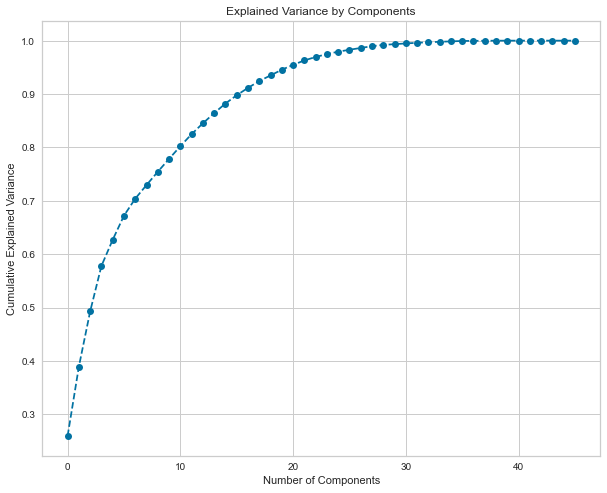

In [23]:
plt.figure(figsize = (10,8))
plt.plot(range(0,46), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [24]:
pca = PCA(n_components= 10)
pca.fit(scaled_final_df)

PCA(n_components=10)

In [25]:
df_PCA = pd.DataFrame(pca.transform(scaled_final_df), columns=(["col1","col2", "col3", "col4", "col5", "col6", "col7", "col8", "col9", "col10"]))

- As a rule of thumb, we want at least 80% of total variance explained. So 10 components would be the best fit.

#### Optimal number of clusters

- We will use the Elbow method to find the optimal number of clusters for our K-Means. We cannot have more than 5 clusters according to the business problem as it will be inefficient for the campaign.

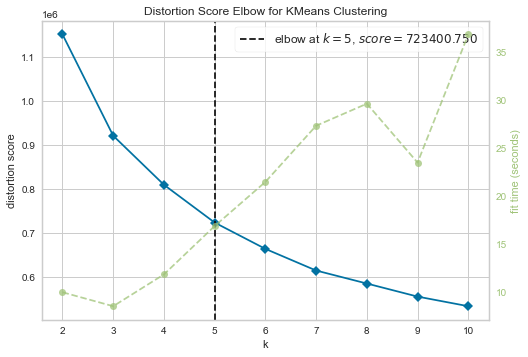

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(df_PCA)
Elbow.show()

- Looks like we should use 5 clusters based on the above plot. We will use 5 as per the business requirement but might see about splitting into less clusters based on the results of the model.

In [26]:
colors = colors.ListedColormap(["aqua", "red", "magenta", "lightgreen", "purple"])

In [27]:
kmeans_5 = KMeans(n_clusters = 5)
model_kmeans5 = kmeans_5.fit_predict(df_PCA)
print(model_kmeans5)

[4 4 3 ... 0 0 1]


In [28]:
kmeans_5.cluster_centers_

array([[ 1.23441617e-01, -4.91353562e-01, -4.58152092e-01,
        -3.63938953e-02, -1.02646893e-01, -1.69870058e-01,
        -4.40538512e-02, -4.44819504e-02, -2.36780598e-02,
         1.76992701e-03],
       [-1.05095928e+00, -2.53370340e-01,  2.21593829e-01,
        -4.93498289e-02,  7.17082991e-02,  1.11661960e-01,
         4.73015254e-02,  2.46075935e-02, -1.86241630e-03,
        -1.12574271e-02],
       [-3.29228762e-01,  7.36944109e-01,  3.28254029e-01,
         1.63715545e-02,  1.54377877e-04, -1.23938643e-01,
        -3.84389684e-02, -4.28210460e-02, -6.35116985e-03,
         1.11488923e-02],
       [ 1.56190008e+00, -5.14253224e-01,  9.12343284e-01,
        -9.54847750e-02,  4.14189189e-02,  1.32536509e-01,
        -1.10421225e-02,  1.39586437e-01,  9.45796731e-02,
        -1.98674033e-02],
       [ 6.60217439e-01,  4.15005359e-01, -5.28797109e-01,
         1.41499066e-01,  2.29242718e-02,  1.49409526e-01,
         4.74696852e-02, -3.90331401e-05, -1.06219653e-02,
         9.

In [29]:
kmeans_5.inertia_

741327.59708525

In [30]:
# Refit result with initializing K-Means from PCA dataframe back to original data
df_final["Clusters"] = model_kmeans5

In [31]:
## Save final data set
df_final.to_csv('C://Users//JCCLI//Downloads//cust_seg_modeled.csv', index = False, header = True)

#### K-Means Analysis

In [29]:
# Preview of clusters data frames
df =  pd.DataFrame(df_PCA)
df['Cluster'] = model_kmeans5
df['Cluster'].value_counts()

3    221601
0    184394
4    151303
2    111399
1     77866
Name: Cluster, dtype: int64

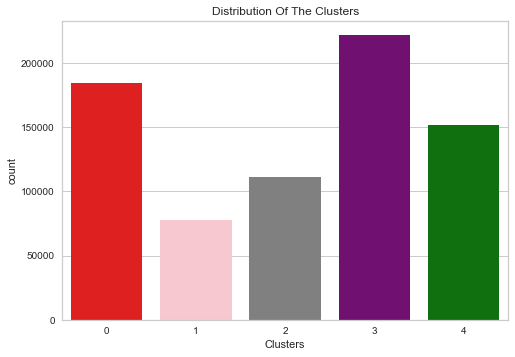

In [30]:
# Plotting bar plots
colors_ = ["red", "pink", "gray", "purple", "green"]
pl = sns.countplot(x=df_final["Clusters"], palette= colors_)
pl.set_title("Distribution Of The Clusters")
plt.show()

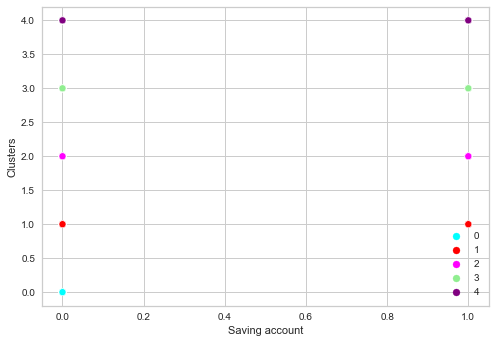

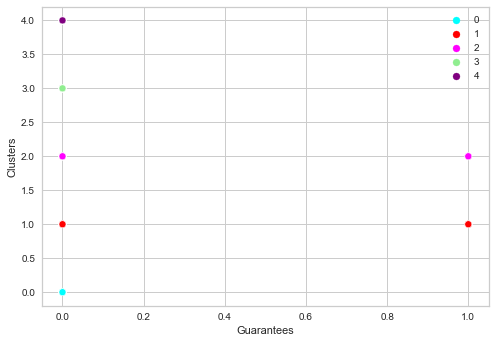

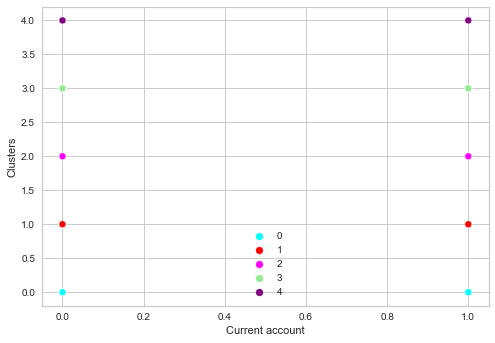

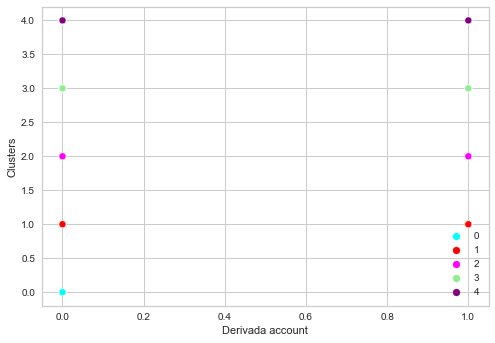

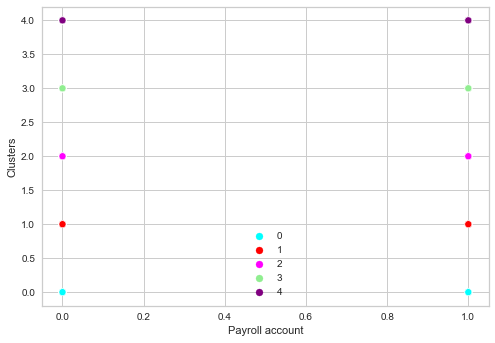

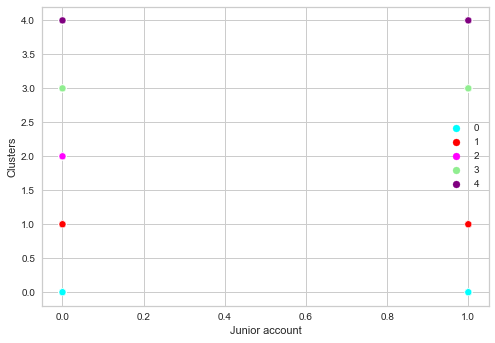

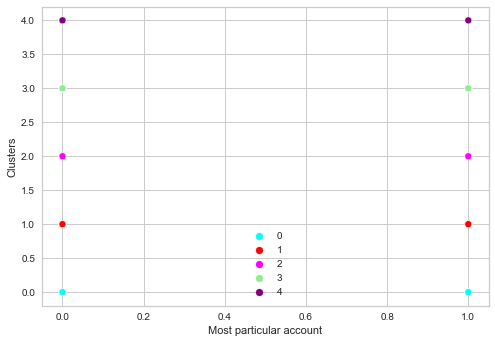

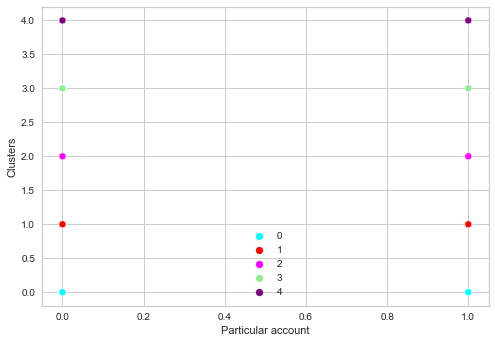

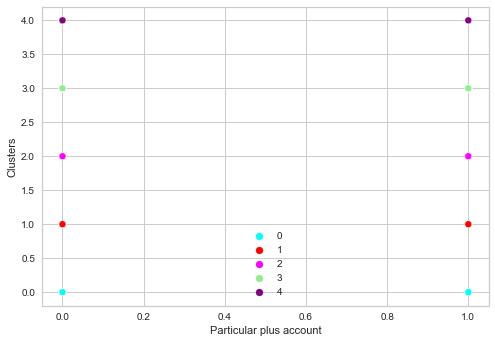

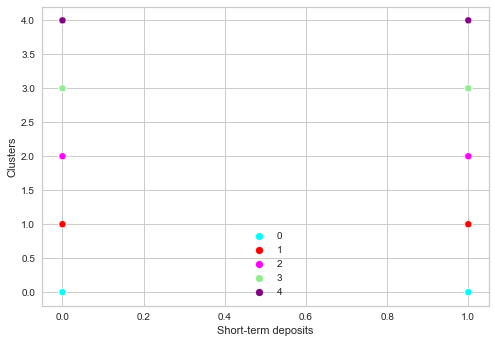

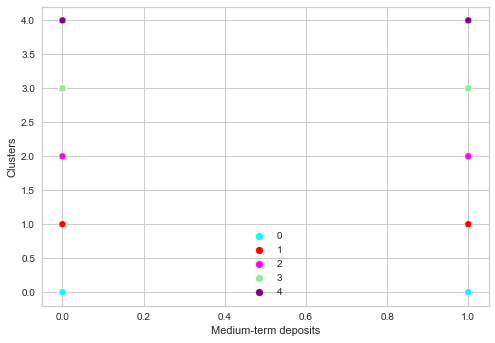

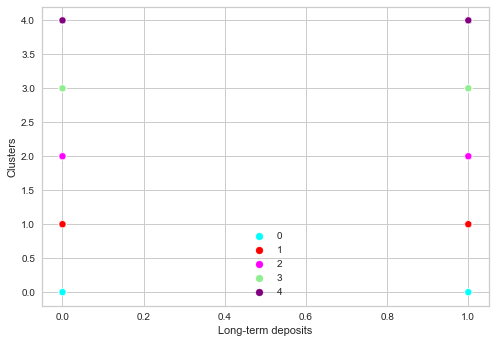

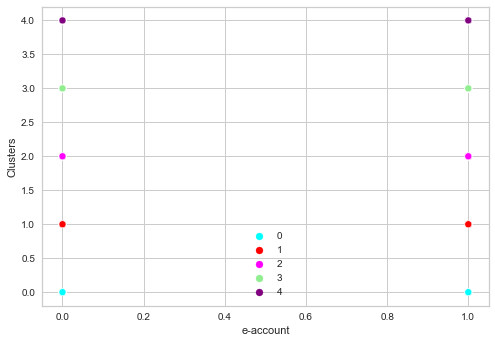

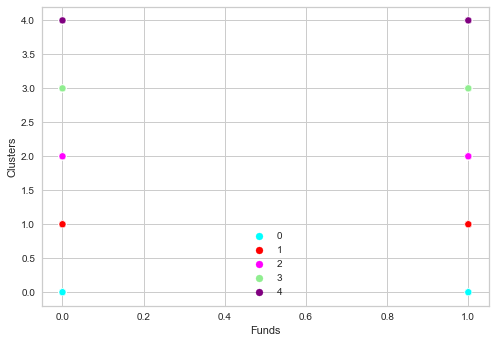

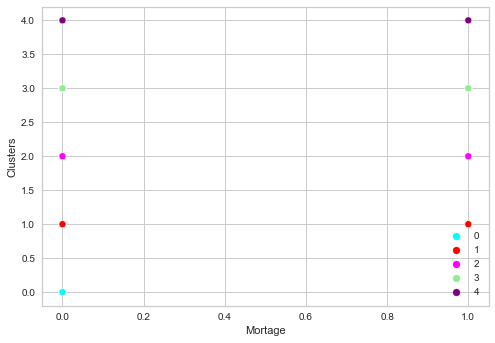

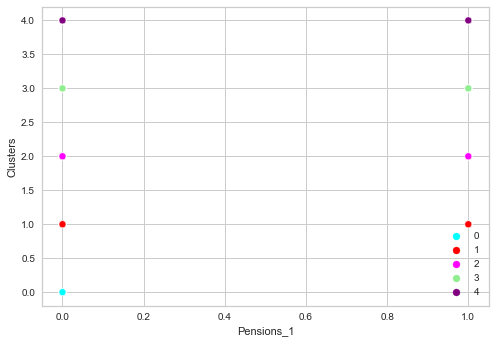

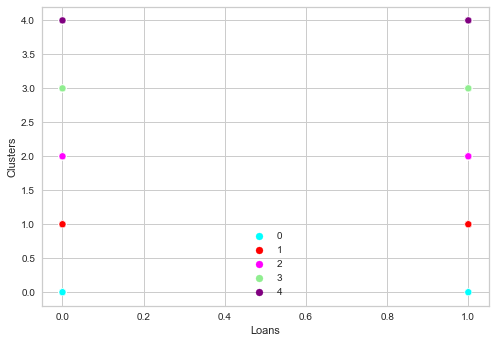

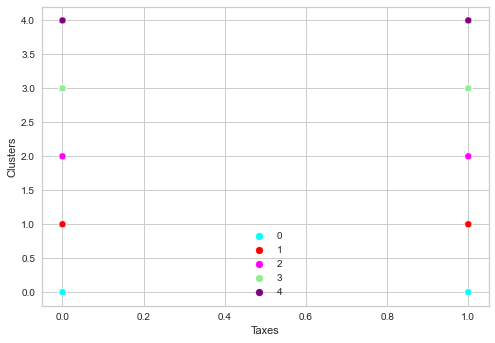

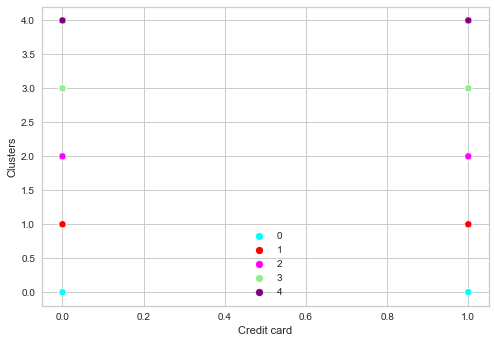

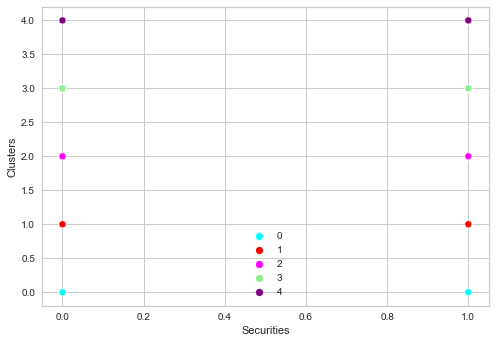

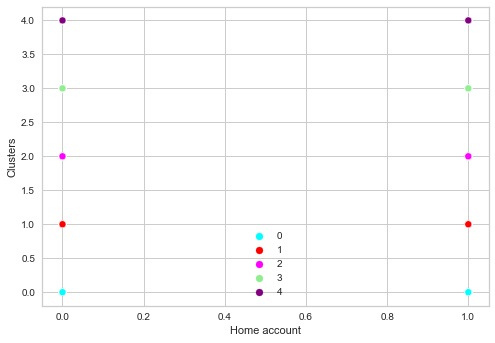

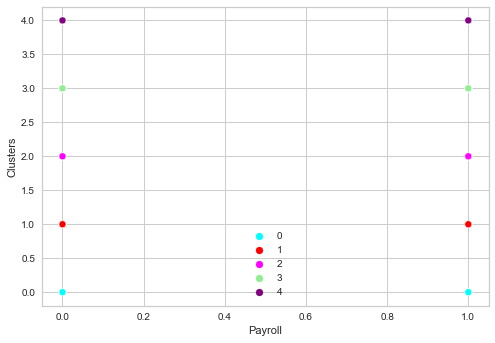

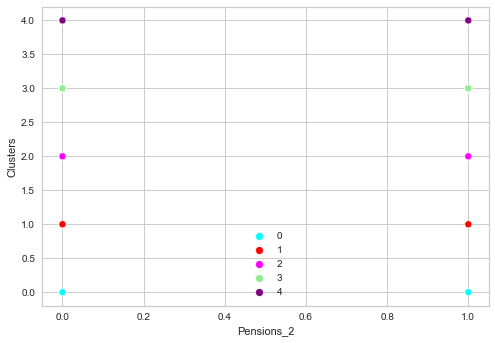

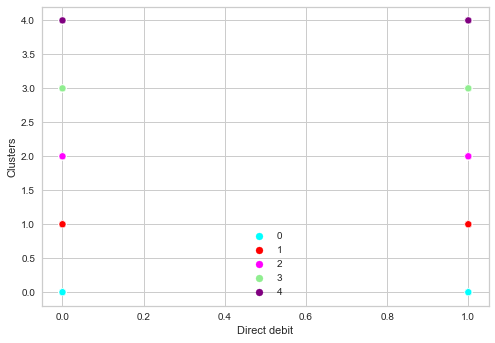

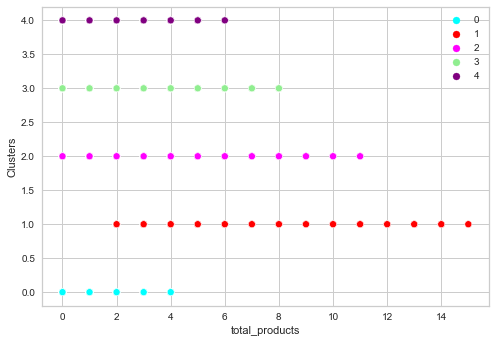

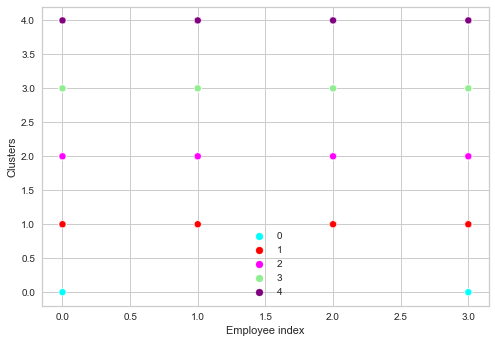

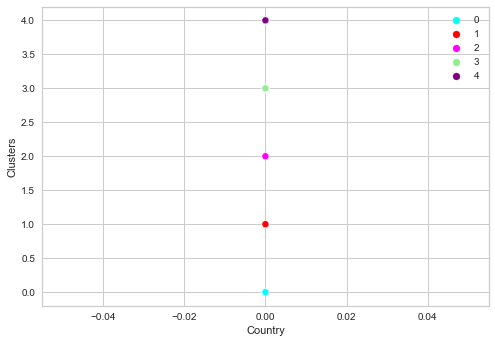

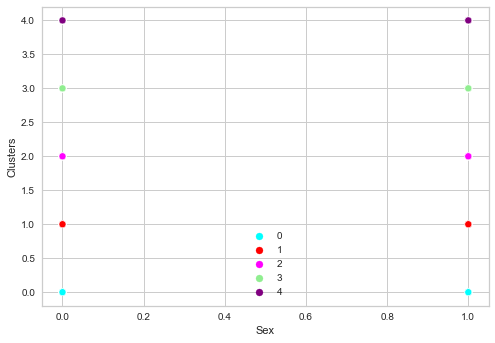

C:\Users\JCCLI\Miniconda_3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


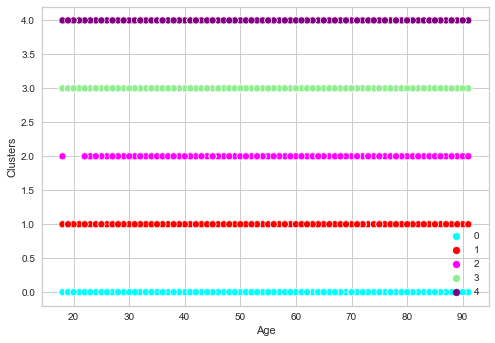

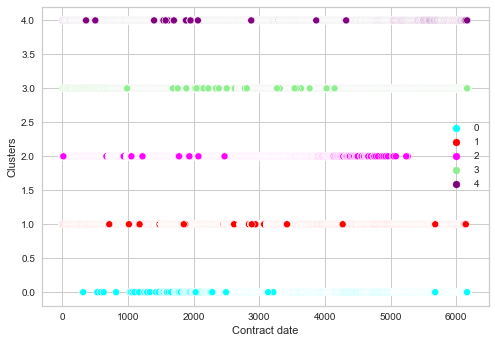

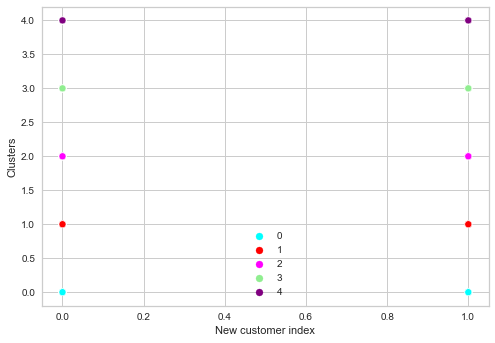

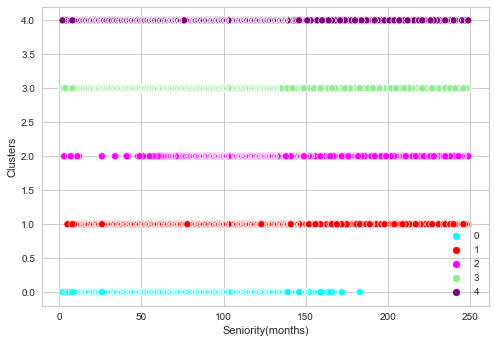

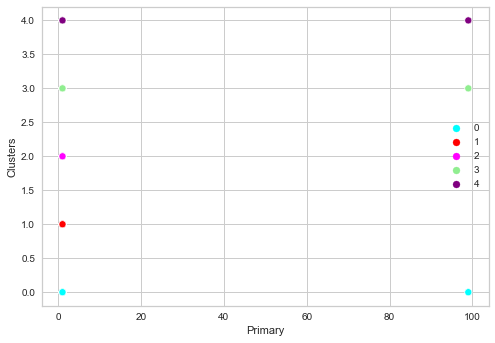

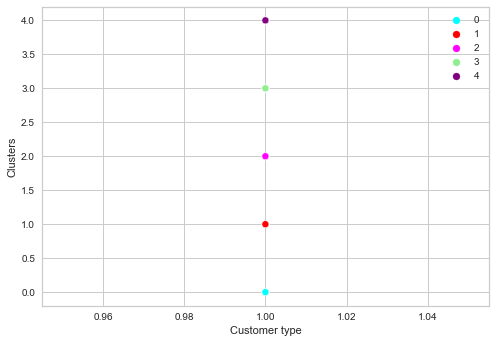

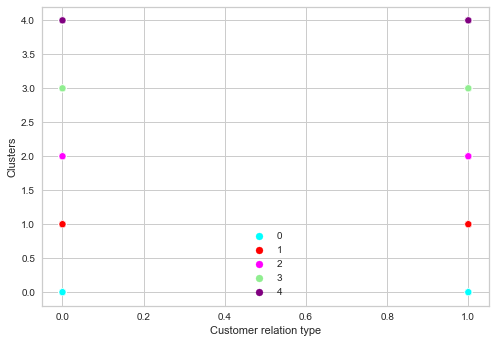

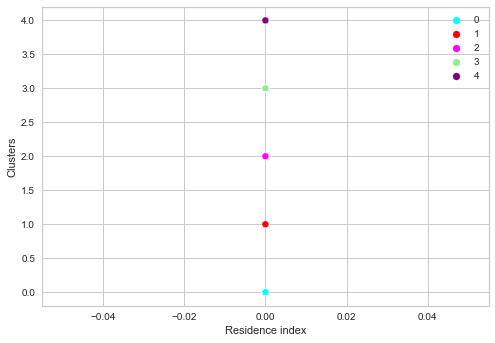

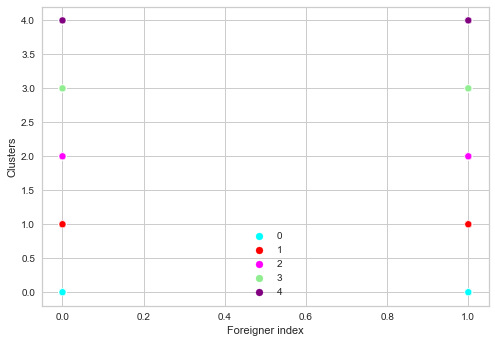

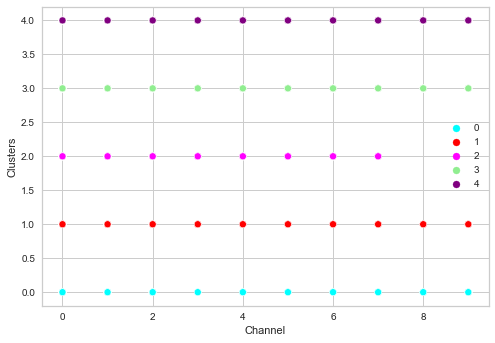

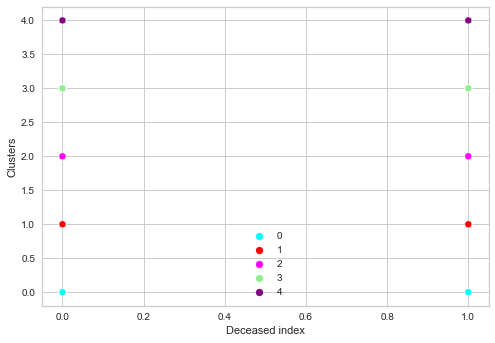

C:\Users\JCCLI\Miniconda_3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


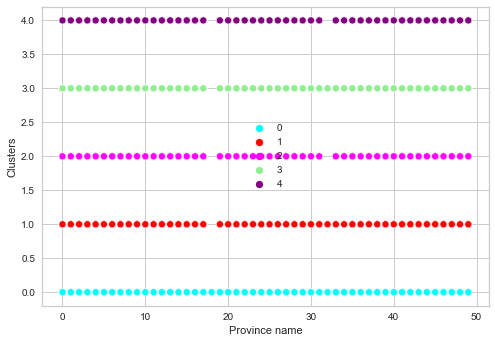

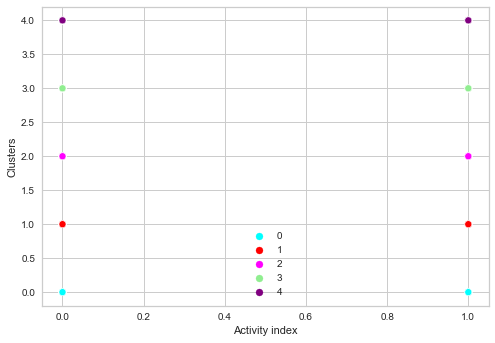

C:\Users\JCCLI\Miniconda_3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


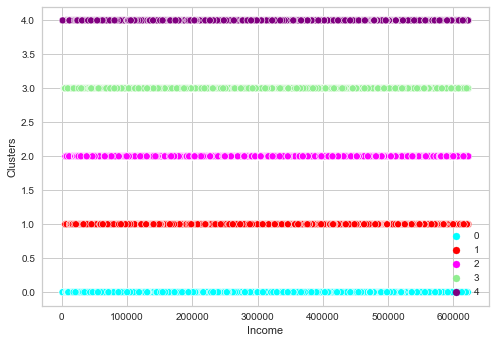

C:\Users\JCCLI\Miniconda_3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


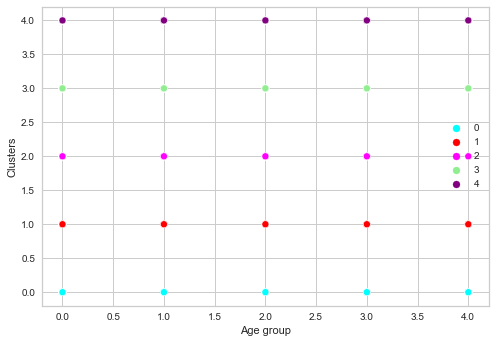

C:\Users\JCCLI\Miniconda_3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


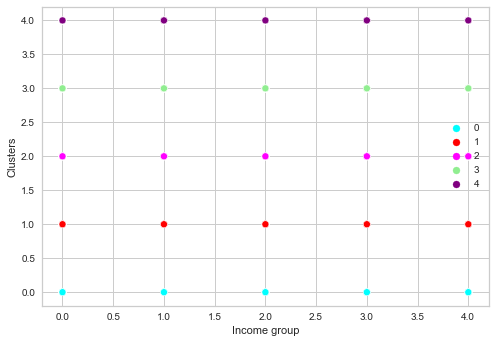

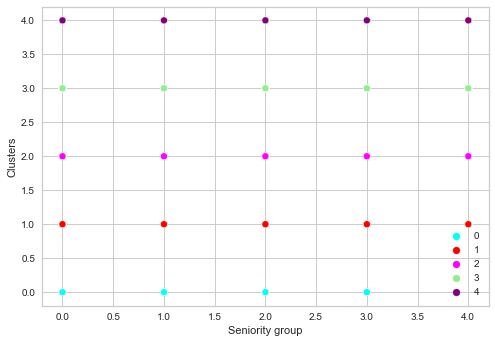

In [31]:
# CLuster analysis by variable
col = list(df_final.columns)
for i in range(45):
    pl = sns.scatterplot(data = df_final, x= col[i], y= df_final["Clusters"], hue= df_final["Clusters"], palette= colors)
    plt.legend()
    plt.show()

In [ ]:
# Product Analysis for Clusters


**Findings**

**Cluster 0**
- No Guarantees
- Low amount have Saving Account (10 customers) and Particular Account (3 customers)
- No more than 9 total products, most customers have 1 (35.11%) or 2 (36.58%)
- Employee Index not including A (active), with most of the customers not being employees (N)
- Seniority less than 200 months, over 55% are between 0 and 50 months
- Age distribution covers almost all ages, customers peak at age range 39-45
- Customer Relation at beginning of month is mostly A (active)
- Around 54% Female, 45% Male
- Most common channels in order from most to least common include KFC, KAT, KHE
- Income group of 100k-500k is most common, along with those that make 50k-100k


**Cluster 1**
- Almost all customers (97%) have a Current Account

- 2 or more products
- Not including 1 city

**Cluster 2**
- No Junior Account
- No more than 11 total products
- Not including 2 cities
- Ages 21, 20, 19 not included
- Channels KHE and KHK not included

**Cluster 3**
- No Guarantees
- No more than 8 total products
- Not including 1 city

**Cluster 4**
- No Guarantees
- No more than 6 total products
- Not including 2 cities

 Now let's try Hierarchical Clustering and compare the results

### Hierarchical Clustering

Hierarchical clustering is a type of clustering method used in unsupervised learning. The goal of hierarchical clustering is to create clusters that already are preordered from top to bottom. There are two major types of hierarchical clustering, which are **Agglomerative Hierarchical Clustering** and **Divisive Hierarchical Clustering**.

**Agglomerative Hierarchical Clustering**
- For this type of hierarchical clustering, we start with individual clusters for each data point and then merge the clusters through ranking on their closeness. The final cluster contains all data.

**Divisive Hierarchical Clustering**
- For this type of hierarchical clustering, we start with the cluster containing all the data. For each step, we split the most distant data in the cluster, and is repeated until we have individual data points.

- For our analysis, we will only use Agglomerative Clustering

In [47]:
### Agglomerative Hierarchical Clustering
df_cluster = df_final.sample(frac = 0.02)
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(df_cluster)

array([2, 0, 0, ..., 0, 2, 0], dtype=int64)

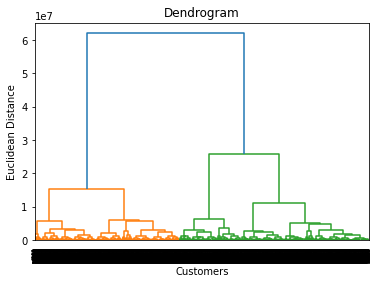

In [30]:
dendrogram = sch.dendrogram(sch.linkage(df_cluster, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

#### Individual Analysis
- Let's compare the results we get here with KMeans

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


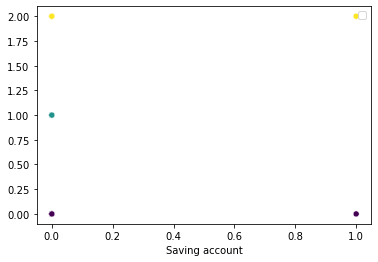

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


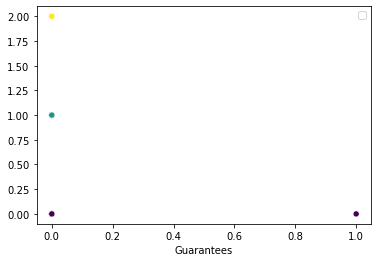

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


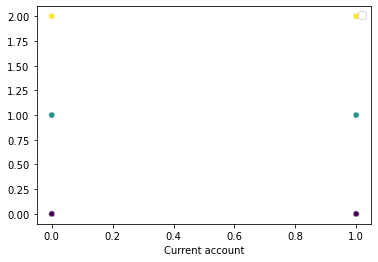

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


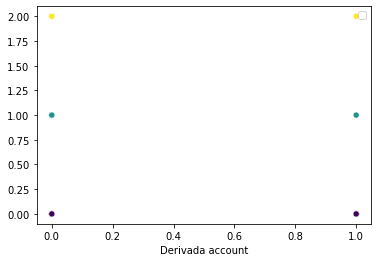

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


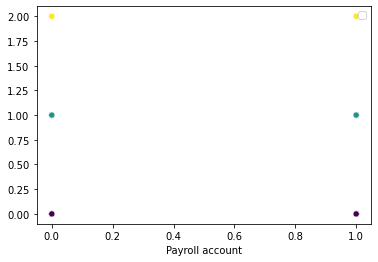

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


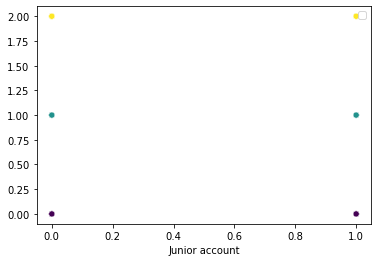

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


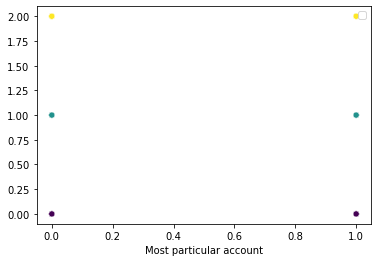

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


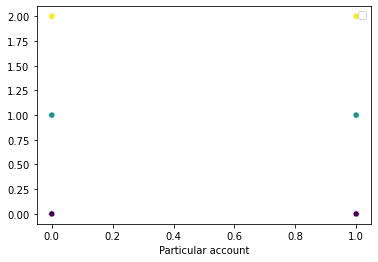

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


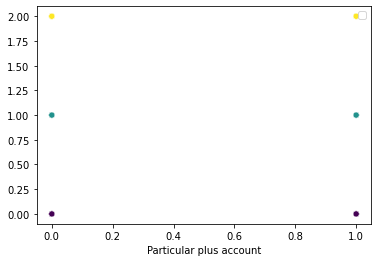

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


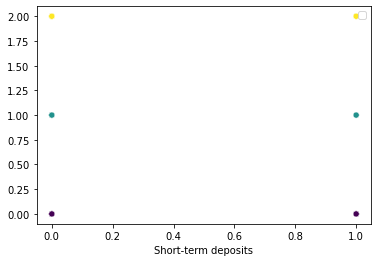

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


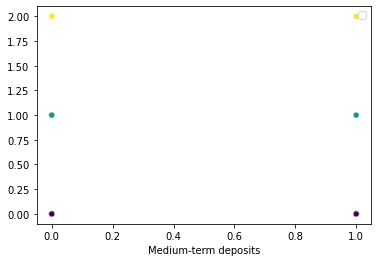

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


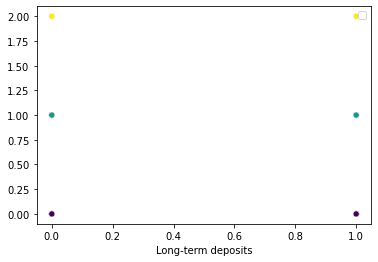

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


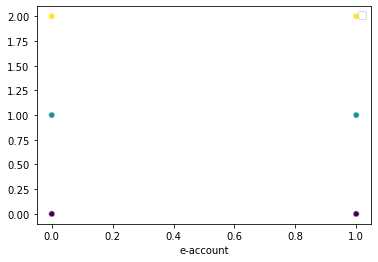

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


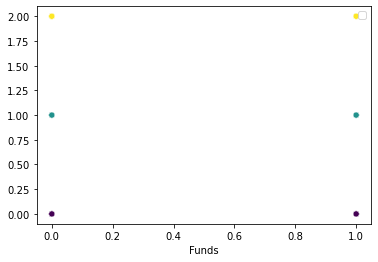

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


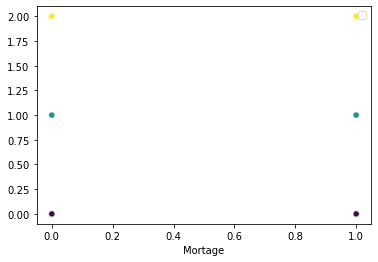

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


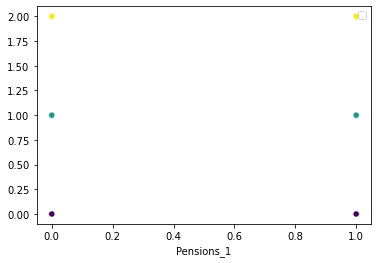

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


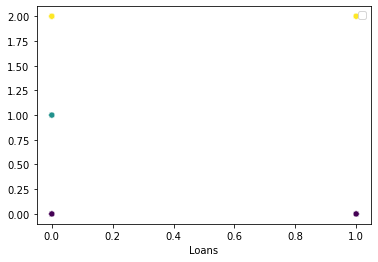

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


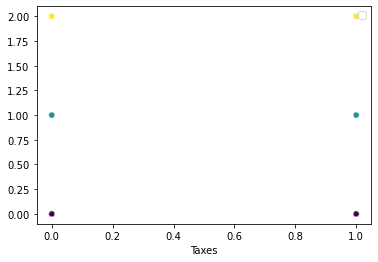

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


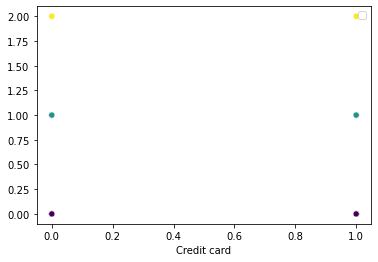

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


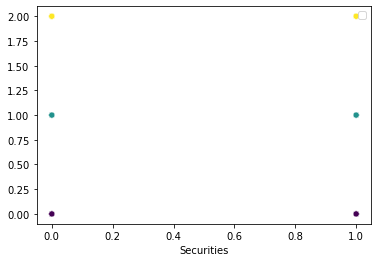

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


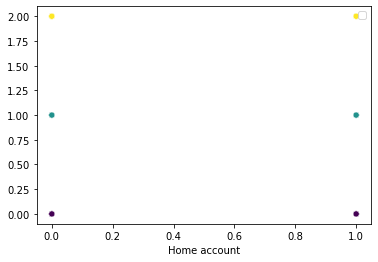

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


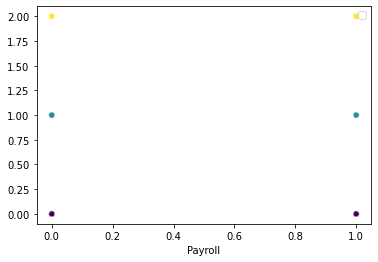

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


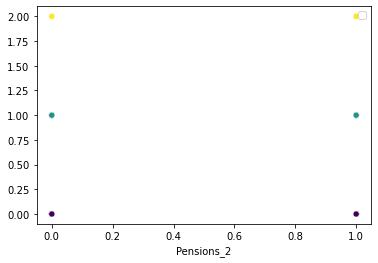

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


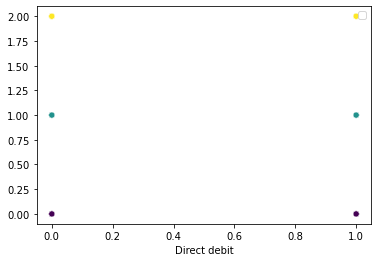

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


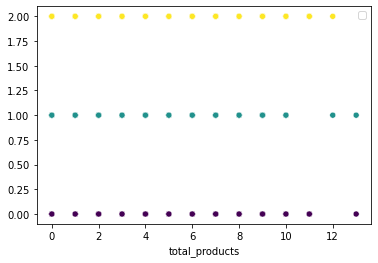

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


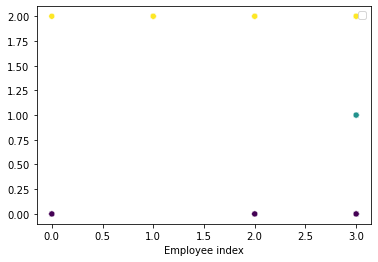

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


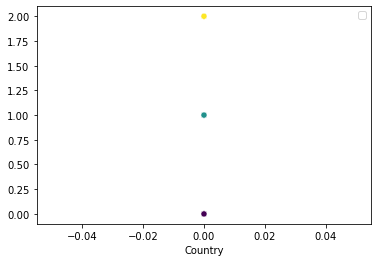

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


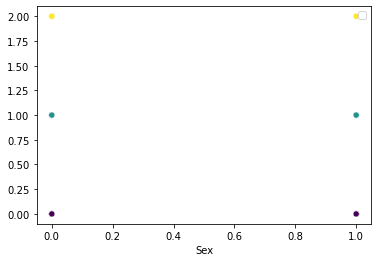

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


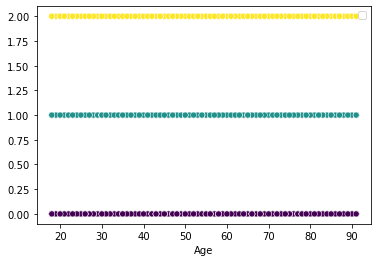

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


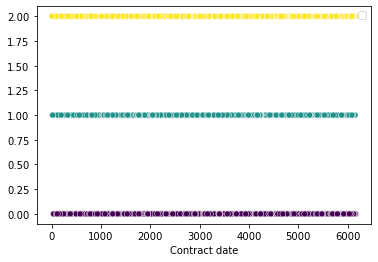

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


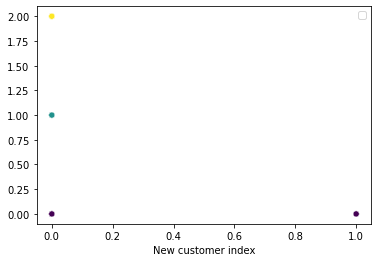

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


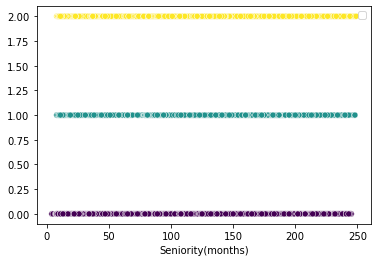

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


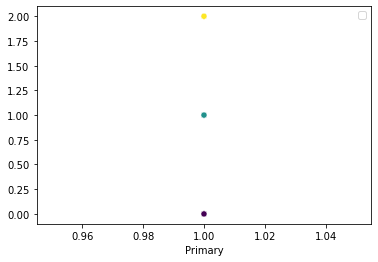

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


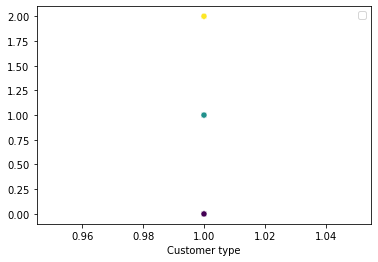

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


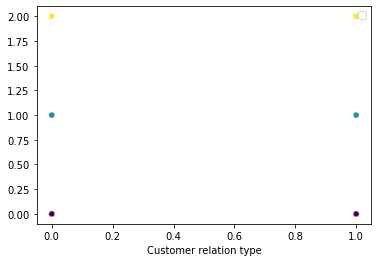

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


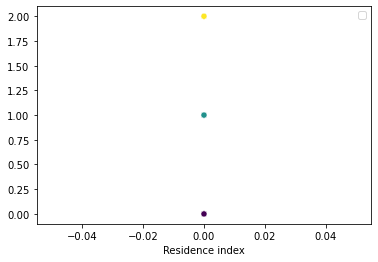

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


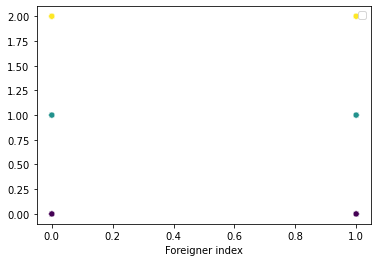

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


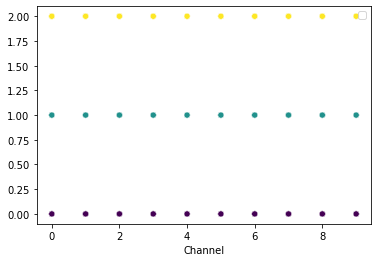

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


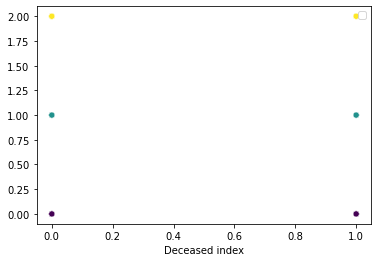

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


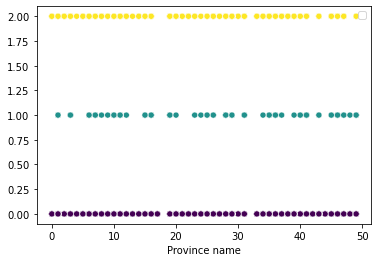

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


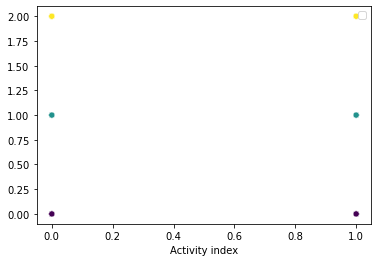

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


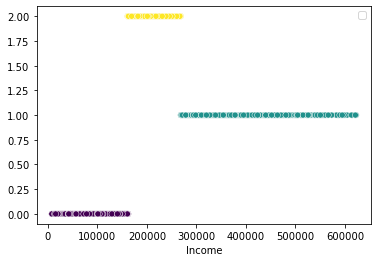

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


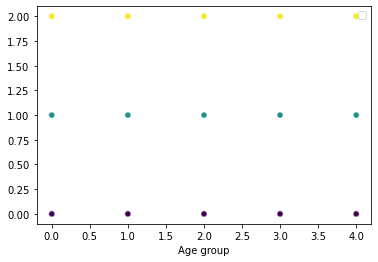

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


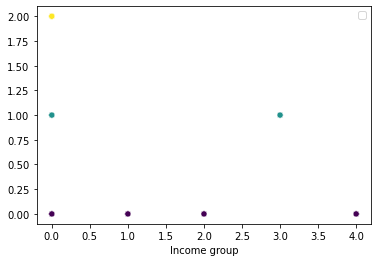

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


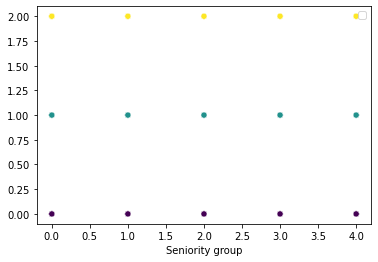

In [48]:
col = list(df_cluster.columns)
for i in range(45):
    pl = sns.scatterplot(data = df_cluster, x= col[i], y= cluster.labels_, c = cluster.labels_)
    plt.legend()
    plt.show()

**Findings**

**Cluster 0**
- Excluding those with 12 total products
- Employee Index not ex-employed
- Excluding 2 cities
- Income less than 500,000

**Cluster 1**
- No Saving Account
- No Guarantees
- No Loans
- Excluding those with 11 total products
- Only includes customers who are not an employee according to their Employee Index
- Registered after 6 months
- Excluding many cities
- Income greater than 250,000

**Cluster 2**
- No Guarantees
- No more than 12 total products
- Registered after 6 months
- Excluding 6 cities
- Income between 150,000 and 300,000



- Overall, while we are able to split our data up into 5 clusters successfully, this is not the best method due to the limitation of our data set size which is close to 1M records, and we are severely limited with the amount of data we can use without running out of memory

## Final Recommendation

- Overall, K-Means is the preferred modeling choice since it can cover the entire dataset, but we can question and recommend parts of the Hierarchical Clustering into our final recommendation.

**Final Recommendation**

So based on our modeling we can accurately say that based on the clusters we can segment our customers into 5 different groups. We will mainly be going with the results of the K-Means model since it covers all of the data whereas the Agglomerative Hierarchical model only covers a small fraction of it. However, there are still some recommendations for the grouping of customers based on the Agglomerative model and our EDA.

- From the Hierarchical model, we did see that Income was a significant factor when dividing up customers, so maybe, we could have a couple groups that didn’t have Guarantees have income between 150,000 and 300,000.

- We could also consider the time of registration as a couple groups from the Hierarchical model contained customers who registered after the first 6 months.

- The bank could also focus maybe on other cities/provinces in Spain.
